In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [47]:
def random_points(filename, n_points):
    """
    Load image, resize it to have 720 width, use Canny algorithm to get edges,
    than create a file with n_points random points and 10 points from each edge of the image
    saving the coordinates (x, y) and the original colors of the image. 
    """
    color_img = cv2.imread('images/' + filename)
    color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)  #height x width x rgb
    color_img = np.array(color_img)
    dim = np.array(color_img.shape) #height x width
    dim = (dim/dim[0] * 720).astype(np.uint32)
    color_img = cv2.resize(color_img, (dim[1], dim[0]), interpolation = cv2.INTER_AREA)

    x_ind = np.random.choice(list(range(dim[1])), n_points)
    y_ind = np.random.choice(list(range(dim[0])), n_points)
    filename = filename.split('.')[0]
    with open('images/' + filename + '_' + str(n_points) + '_random_points.txt', 'w') as f:
        for i in range(n_points):
            x_i = x_ind[i]
            y_i = y_ind[i]
            rgb = color_img[y_i, x_i, :]
            s = ''
            s += str(x_i) + ' ' + str(y_i) + ' '
            s += str(rgb[0]) + ' ' + str(rgb[1]) + ' ' + str(rgb[2]) + '\n'
            f.write(s)
            
    x_ind = np.random.choice(list(range(dim[1])), 10)
    y_ind = np.random.choice(list(range(dim[0])), 10)
    with open('images/' + filename + '_' + str(n_points) + '_random_points.txt', 'a') as f:
        for i in range(10):
            for (x_i, y_i) in [(0, y_ind[i]), (dim[1] - 1, y_ind[i]), (x_ind[i], 0), (x_ind[i], dim[0] - 1)]:
                rgb = color_img[y_i, x_i]
                s = ''
                s += str(x_i) + ' ' + str(y_i) + ' '
                s += str(rgb[0]) + ' ' + str(rgb[1]) + ' ' + str(rgb[2]) + '\n'
                f.write(s)
    return

In [62]:
def edge_points(filename, n_points = 100):
    """
    Load image, resize it to have 720 width, use Canny algorithm to get edges,
    than create a file with n_points random points from the edges
    saving the coordinates (x, y) and the original colors of the image. 
    """
    color_img = cv2.imread('images/' + filename)
    color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB) 
    filename = filename.split('.')[0]
    color_img = np.array(color_img)
    dim = np.array(color_img.shape)
    dim = (dim/dim[0] * 720).astype(np.uint32)
    color_img = cv2.resize(color_img, (dim[0], dim[1]), interpolation = cv2.INTER_AREA)
    img = color_img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.Canny(image=img, threshold1=60, threshold2=100) # Canny Edge Detection
    y, x = np.where(img > 0)
    n_max_points = x.shape[0]
    indices = np.random.choice(list(range(n_max_points)), n_points)
    with open('images/' + filename + '_' + str(n_points) + '_points.txt', 'w') as f:
        for i in indices:
            rgb = color_img[y[i], x[i]]
            s = ''
            s += str(x[i]) + ' ' + str(y[i]) + ' '
            s += str(rgb[0]) + ' ' + str(rgb[1]) + ' ' + str(rgb[2]) + '\n'
            f.write(s)
    
    print(dim)
    print(color_img.shape)

    x_ind = np.random.choice(list(range(dim[1])), 10)
    print(x_ind.max())
    y_ind = np.random.choice(list(range(dim[0])), 10)
    print(y_ind.max())
    with open('images/' + filename + '_' + str(n_points) + '_random_points.txt', 'a') as f:
        for i in range(10):
            for (x_i, y_i) in [(0, y_ind[i]), (dim[1] - 1, y_ind[i]), (x_ind[i], 0), (x_ind[i], dim[0] - 1)]:
                rgb = color_img[y_i, x_i, :]
                s = ''
                s += str(x_i) + ' ' + str(y_i) + ' '
                s += str(rgb[0]) + ' ' + str(rgb[1]) + ' ' + str(rgb[2]) + '\n'
                f.write(s)
                
    return

In [63]:
random_points('cat.jpg', 100)
random_points('cat.jpg', 1000)
random_points('cat.jpg', 10000)
edge_points('cat.jpg', 100)
edge_points('cat.jpg', 1000)
edge_points('cat.jpg', 10000)
edge_points('giovani.jpeg', 100)
edge_points('giovani.jpeg', 1000)
edge_points('giovani.jpeg', 10000)
random_points('giovani.jpeg', 100)
random_points('giovani.jpeg', 1000)
random_points('giovani.jpeg', 10000)

[720 509   0]
(509, 720, 3)
485
682


IndexError: index 719 is out of bounds for axis 0 with size 509

In [7]:
import json

In [8]:
color_img = cv2.imread('images/giovani.jpeg')
color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB) 
color_img = np.array(color_img)
dim = np.array(color_img.shape)
dim = (dim/dim[0] * 720).astype(np.uint32)
color_img = cv2.resize(color_img, (dim[1], dim[0]), interpolation = cv2.INTER_AREA)

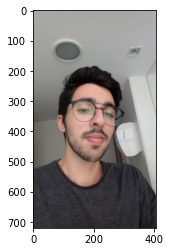

In [9]:
plt.imshow(color_img)

In [23]:
color_img.shape

(720, 405, 3)

In [40]:
with open('images/cat_1000_random_points.json', 'r') as f:
    triangulation =json.load(f)

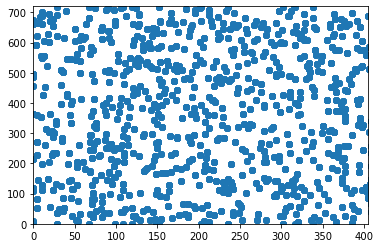

In [41]:
m = np.concatenate([t['points'] for t in triangulation])
plt.xlim((0, 405))
plt.ylim((0, 720))
plt.scatter(m[:, 0], m[:, 1])

In [42]:
np.min([np.min(t['points']) for t in triangulation])

0.0

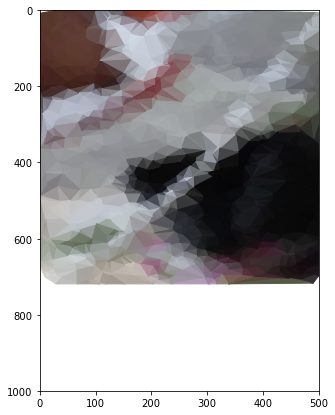

In [43]:
plt.figure(figsize = (5, 7))
plt.xlim((0, 500))
plt.ylim((1000, 0))
for t in triangulation:
    color = np.mean(t['colors'], axis = 0)/255
    #color = np.array([np.mean(color)] * 3)
    plt_t = plt.Polygon([[x, y] for (x, y) in t['points']], color=color)
    plt.gca().add_patch(plt_t)

plt.show()

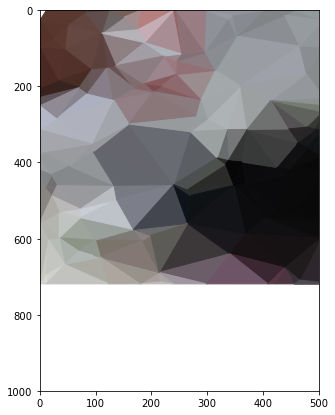

In [44]:
with open('images/cat_100_random_points.json', 'r') as f:
    triangulation =json.load(f)
plt.figure(figsize = (5, 7))
plt.xlim((0, 500))
plt.ylim((1000, 0))
for t in triangulation:
    color = np.mean(t['colors'], axis = 0)/255
    #color = np.array([np.mean(color)] * 3)
    plt_t = plt.Polygon([[x, y] for (x, y) in t['points']], color=color)
    plt.gca().add_patch(plt_t)

plt.show()

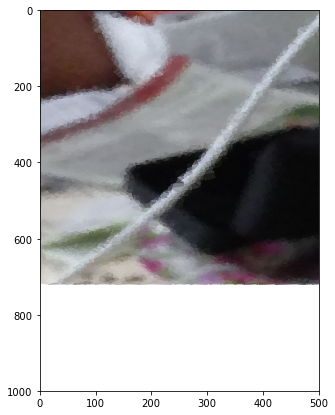

In [45]:
with open('images/cat_10000_random_points.json', 'r') as f:
    triangulation =json.load(f)
plt.figure(figsize = (5, 7))
plt.xlim((0, 500))
plt.ylim((1000, 0))
for t in triangulation:
    color = np.mean(t['colors'], axis = 0)/255
    #color = np.array([np.mean(color)] * 3)
    plt_t = plt.Polygon([[x, y] for (x, y) in t['points']], color=color)
    plt.gca().add_patch(plt_t)

plt.show()